In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)

NumPy version: 1.26.4
Pandas version: 2.2.2
Seaborn version: 0.13.2
Matplotlib version: 3.10.0


# **Data Loading and Overview**

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [5]:
# check for null values in each column

df.isnull().sum()

,0
Disease,0
Fever,0
Cough,0
Fatigue,0
Difficulty Breathing,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Outcome Variable,0


In [6]:
# d type of each columns

df.dtypes


,0
Disease,object
Fever,object
Cough,object
Fatigue,object
Difficulty Breathing,object
Age,int64
Gender,object
Blood Pressure,object
Cholesterol Level,object
Outcome Variable,object


In [7]:
# Check for unique diseases in the 'Disease' column
unique_diseases = df['Disease'].unique()
len(unique_diseases)

116

In [8]:
df['Blood Pressure'].unique()
df['Cholesterol Level'].unique()

array(['Normal', 'Low', 'High'], dtype=object)

# **EDA**

## Distribution of Numerical Features

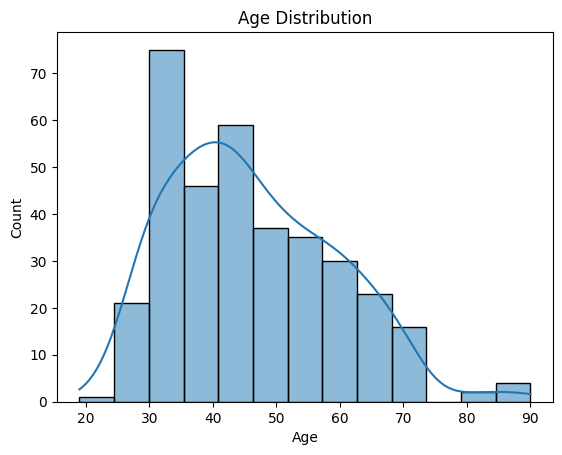

In [9]:
# Plot distribution for Age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

## Distribution of Categorical Features

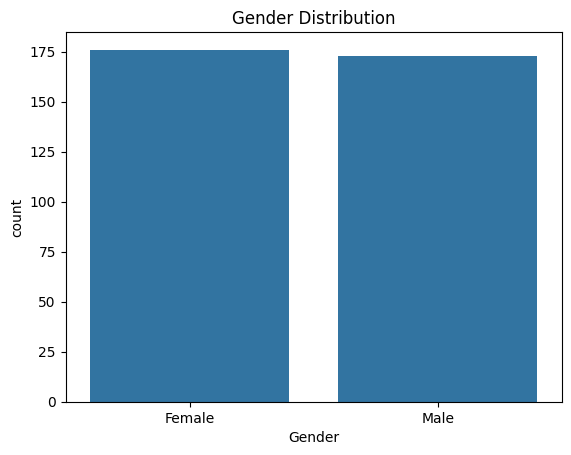

In [10]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


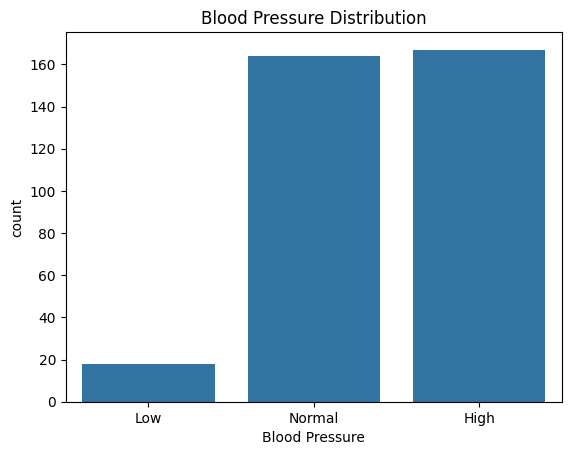

In [11]:
# Blood Pressure distribution
sns.countplot(x='Blood Pressure', data=df)
plt.title('Blood Pressure Distribution')
plt.show()


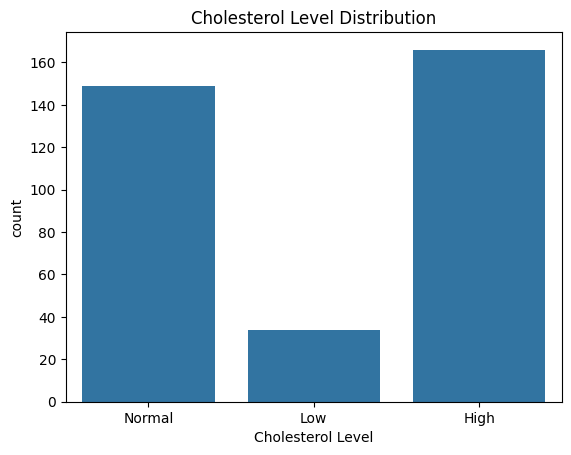

In [12]:
# Cholesterol Level distribution
sns.countplot(x='Cholesterol Level', data=df)
plt.title('Cholesterol Level Distribution')
plt.show()


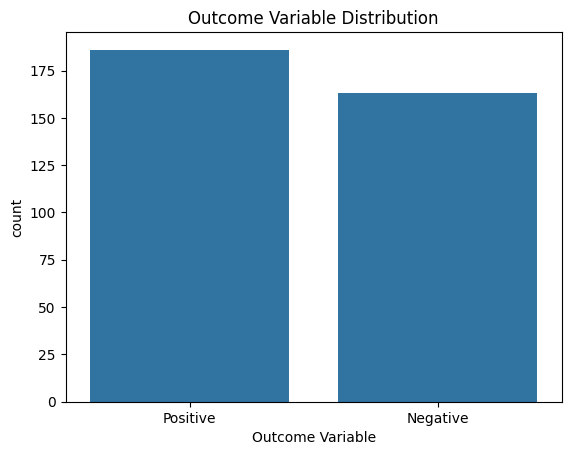

In [13]:
# Outcome Variable distribution
sns.countplot(x='Outcome Variable', data=df)
plt.title('Outcome Variable Distribution')
plt.show()


## Distributiuon of binary columns

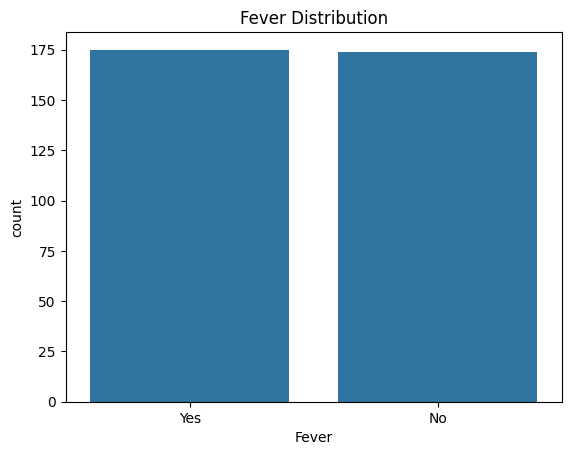

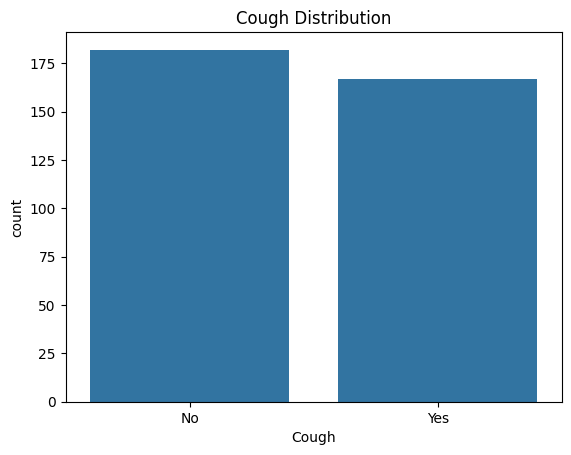

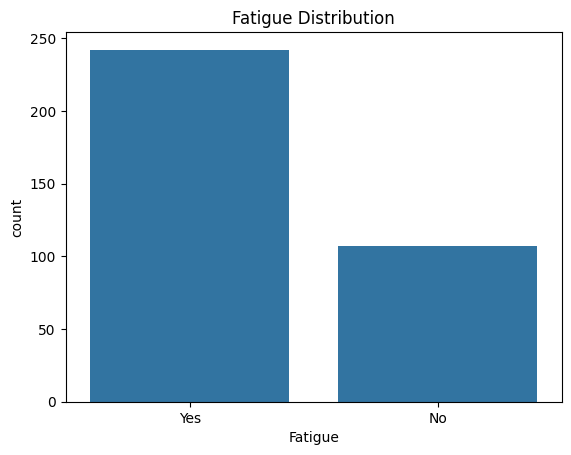

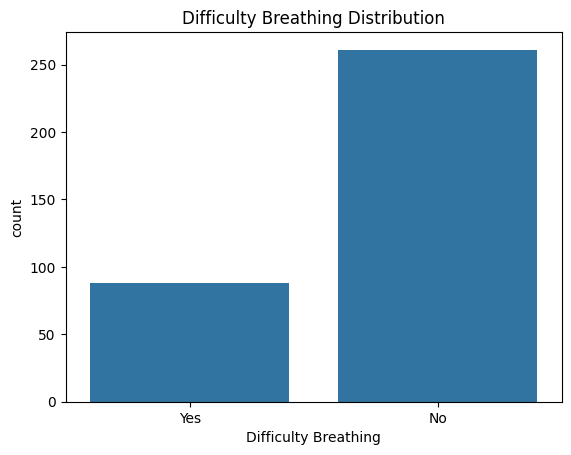

In [14]:
# Symptom feature distributions
symptoms = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
for symptom in symptoms:
    sns.countplot(x=symptom, data=df)
    plt.title(f'{symptom} Distribution')
    plt.show()

## Other distribution

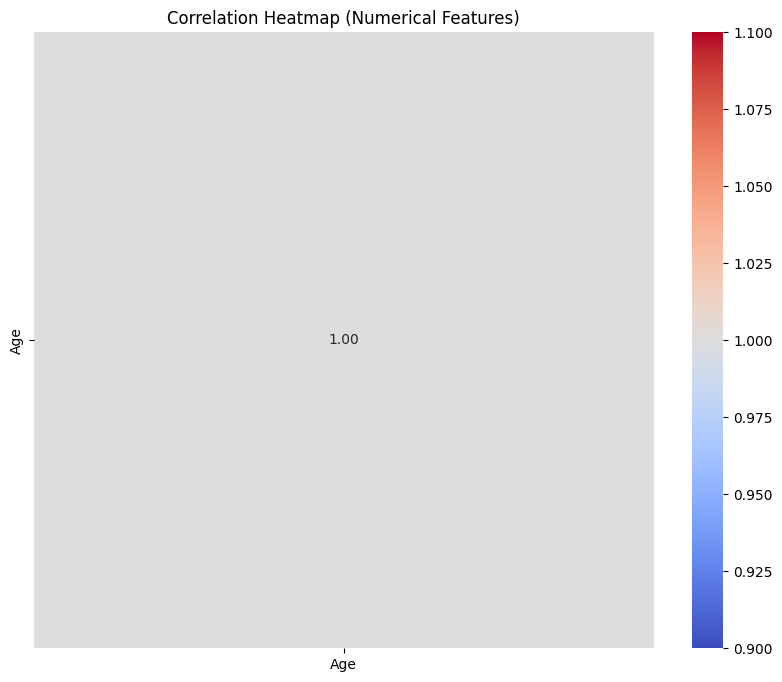

In [15]:
# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
corr = df[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


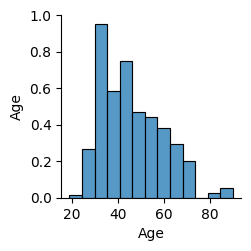

In [16]:
# Pairplot to examine relationships between numerical features
sns.pairplot(df[['Age', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']])
plt.show()


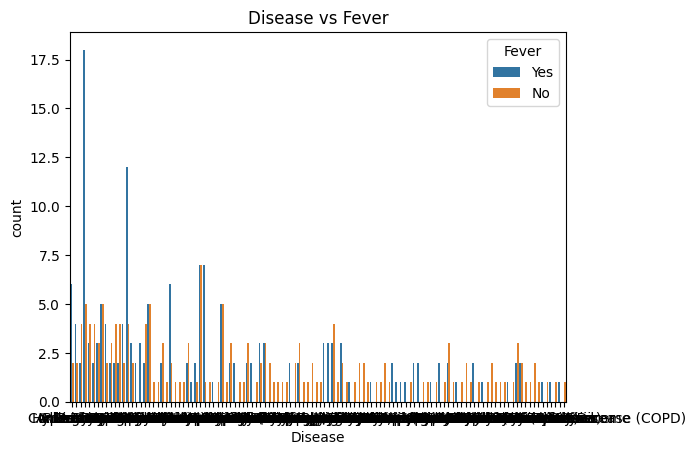

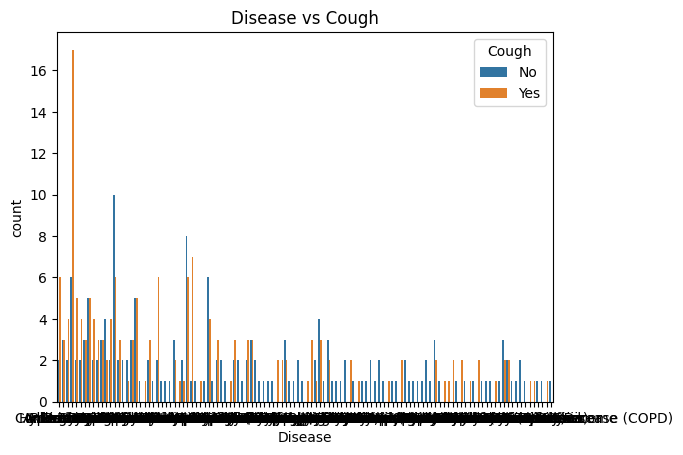

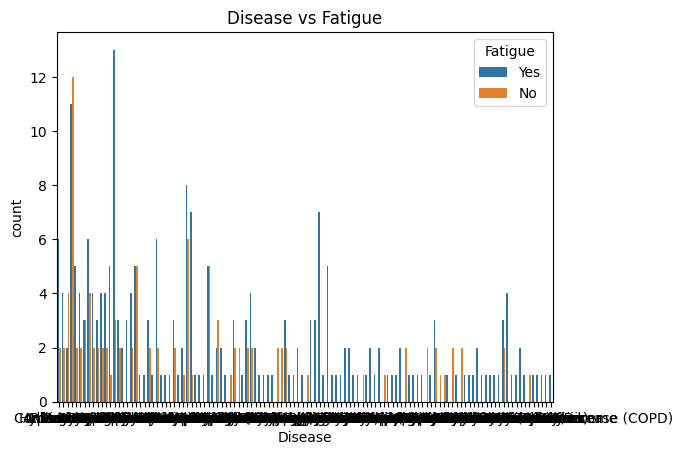

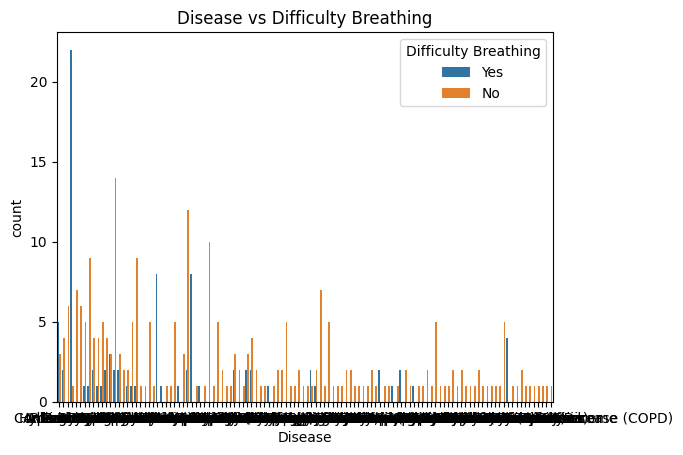

In [17]:
# Disease vs Fever
sns.countplot(x='Disease', hue='Fever', data=df)
plt.title('Disease vs Fever')
plt.show()

# Disease vs Cough
sns.countplot(x='Disease', hue='Cough', data=df)
plt.title('Disease vs Cough')
plt.show()

# Disease vs Fatigue
sns.countplot(x='Disease', hue='Fatigue', data=df)
plt.title('Disease vs Fatigue')
plt.show()

# Disease vs Difficulty Breathing
sns.countplot(x='Disease', hue='Difficulty Breathing', data=df)
plt.title('Disease vs Difficulty Breathing')
plt.show()


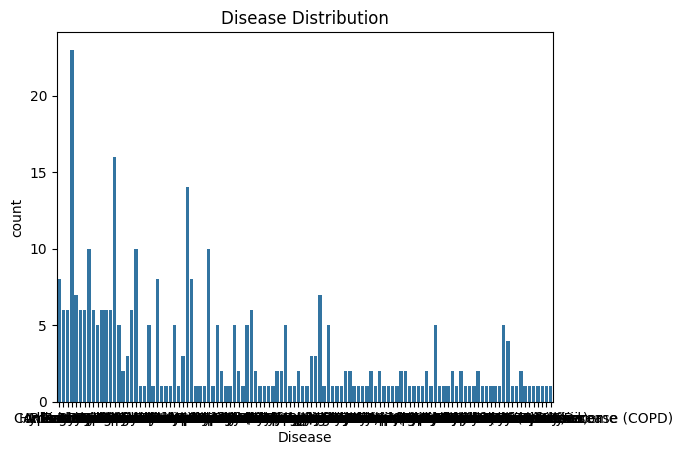

In [18]:
# Disease distribution
sns.countplot(x='Disease', data=df)
plt.title('Disease Distribution')
plt.show()


# Data preprocessing and Model evaluation


In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



In [20]:
# Preprocess the data

# Drop the "Outcome Variable" column
df = df.drop(columns=['Outcome Variable'])




In [21]:
# Encode binary symptoms ('Yes'/'No' to 1/0)
binary_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)



<ipython-input-21-08a25862fe13>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)


In [22]:
# Label encode the target variable 'Disease' since it's a target column
label_encoder = LabelEncoder()
df['Disease'] = label_encoder.fit_transform(df['Disease'])



In [23]:
#  Define the features (X) and target variable (y)
X = df.drop(columns=['Disease'])  # Features
y = df['Disease']  # Target



In [24]:
#  Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', 'passthrough', binary_columns),  # No transformation needed for these columns
        ('categorical', OneHotEncoder(handle_unknown='ignore'), ['Gender', 'Blood Pressure', 'Cholesterol Level']),  # One-hot encode these categorical columns
        ('numerical', StandardScaler(), ['Age'])  # Scale the 'Age' column
    ]
)



In [26]:
# Define the RandomForest model
model = RandomForestClassifier(random_state=42)



In [27]:
#Set up the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])




In [28]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', 'passthrough',
                                                  ['Fever', 'Cough', 'Fatigue',
                                                   'Difficulty Breathing']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Blood Pressure',
                                                   'Cholesterol Level']),
                                                 ('numerical', StandardScaler(),
                                                  ['Age'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [29]:
# Evaluate the model
y_pred = pipeline.predict(X_test)

# Model Evaluation

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix

In [31]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
# Print the metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
# print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy: 0.30
Precision: 0.29
Recall: 0.30
F1-Score: 0.29


In [33]:
#  Display a classification report (Precision, Recall, F1-Score for each class)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           6       0.75      0.67      0.71         9
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.50      0.50      0.50         2
          18       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         0
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

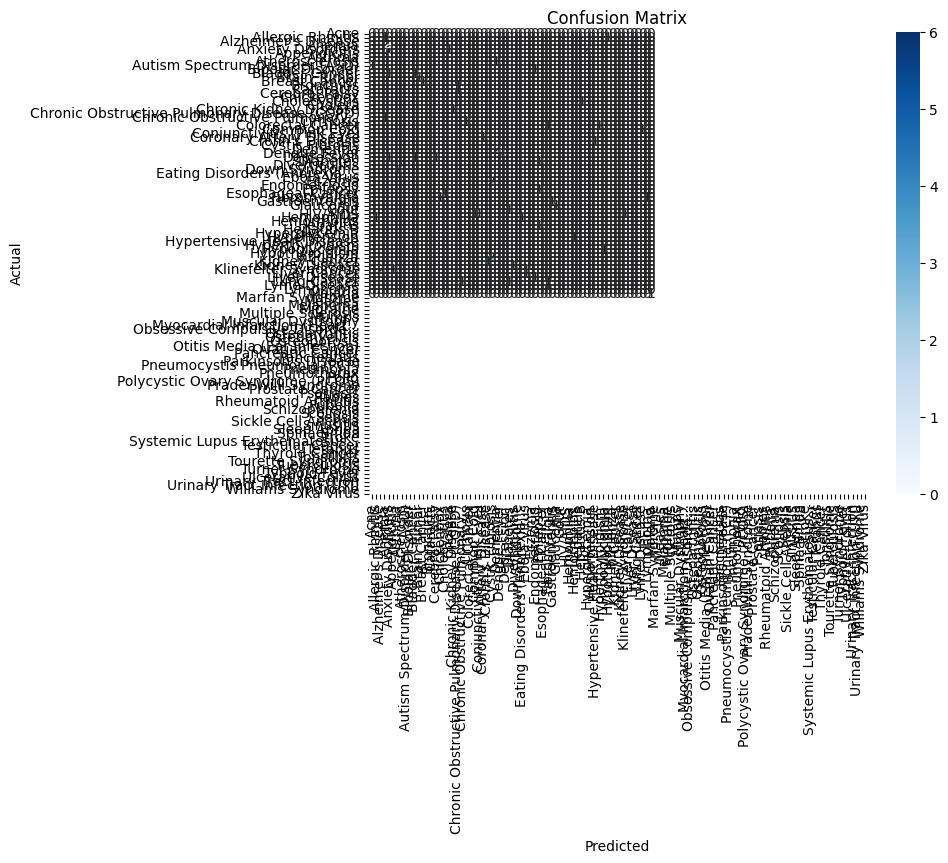

In [34]:
# Plot confusion matrix for further analysis
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# Save the trained model
import joblib
joblib.dump(pipeline, 'disease_prediction_model.pkl')

# Test the model with new input (same preprocessing steps)
new_input = {
    'Fever': ['Yes'],
    'Cough': ['No'],
    'Fatigue': ['Yes'],
    'Difficulty Breathing': ['No'],
    'Age': [45],
    'Gender': ['Male'],
    'Blood Pressure': ['Normal'],
    'Cholesterol Level': ['High']
}

# Convert the new input to a DataFrame
new_input_df = pd.DataFrame(new_input)

# Manually encode the binary columns ('Yes'/'No' to 1/0)
new_input_df[binary_columns] = new_input_df[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

# Apply the pipeline (preprocessing + prediction)
new_prediction = pipeline.predict(new_input_df)

# Decode the prediction from numerical label to the original class name (if necessary)
predicted_disease = label_encoder.inverse_transform(new_prediction)

# Output the prediction
print(f'The predicted disease for the input is: {predicted_disease[0]}')


The predicted disease for the input is: Hypertension


<ipython-input-35-672679600346>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_input_df[binary_columns] = new_input_df[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)


In [36]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)


Scikit-learn version: 1.6.0


In [37]:
import joblib
print("joblib version:", joblib.__version__)


joblib version: 1.4.2


In [38]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [39]:
{
  "Fever": "Yes",
  "Cough": "No",
  "Fatigue": "No",
  "Difficulty_Breathing": "No",
  "Age": 21,
  "Gender": "Male",
  "Blood_Pressure": "Normal",
  "Cholesterol_Level": "high"
}


# uvicorn app:app --reload

{'Fever': 'Yes',
 'Cough': 'No',
 'Fatigue': 'No',
 'Difficulty_Breathing': 'No',
 'Age': 21,
 'Gender': 'Male',
 'Blood_Pressure': 'Normal',
 'Cholesterol_Level': 'high'}